In [17]:
import numpy as np
import emcee
from matplotlib import pyplot as plt
import corner

In [40]:
mean = np.array([5, 8, 3, 2])
cov = np.diag(np.array([3, 2, 1, 0.5]))
ndim = len(mean)
nwalkers = ndim * 2
invcov = np.linalg.inv(cov)

def logpdf(x):
    return -((x - mean) @ invcov @ (x - mean))

p0 = np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, logpdf)
_ = sampler.run_mcmc(p0, 100)
for _ in range(9):
    _ = sampler.run_mcmc(np.mean(sampler.chain, axis=1), 100)

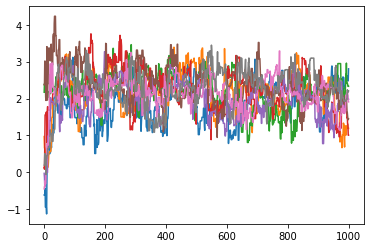

In [41]:
for i in range(nwalkers):
    plt.plot(sampler.chain[i,:,3])

In [42]:
sampler.chain.shape

(8, 1000, 4)

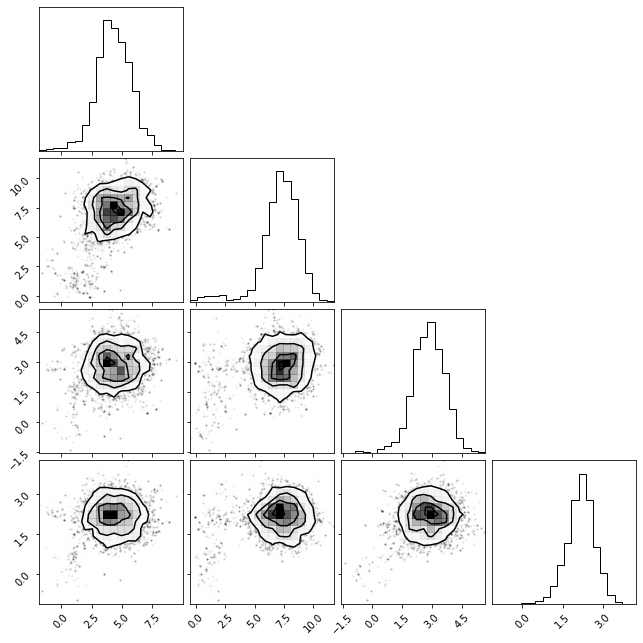

In [43]:
_ = corner.corner(sampler.flatchain)